# Scaling up U-net diffusion

> In this module, we train a conditional U-net with a larger dataset

In [1]:
#| default_exp unet_diffusion_imagenette

In [2]:
# |export
from slowai.attention import ConditionalTAUnet, conditional_train
from slowai.cos_revisited import aesthetics
from slowai.tinyimagenet_a import denorm, get_imagenet_dls
from slowai.utils import show_images

In [3]:
aesthetics()

In [4]:
dls = get_imagenet_dls(bs=64)

In [5]:
cs = set()
for xb, c in dls["test"]:
    cs.update(c.tolist())
max(cs)

199

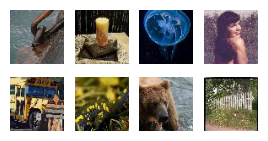

In [6]:
show_images(denorm(xb)[:8, ...], imsize=0.8)

In [7]:
un = ConditionalTAUnet(
    n_classes=200,
    color_channels=3,
    nfs=(32, 64, 128, 256, 384, 512),
    n_blocks=(3, 2, 1, 1, 1, 1, 1),
    attention_heads=(0, 8, 8, 8, 8, 8, 8),
)
f"{sum(p.numel() for p in un.parameters()):,}"

'34,446,784'

loss,epoch,train
1.002,0,train
1.000,0,eval


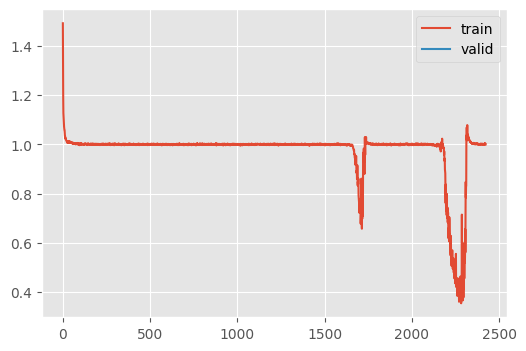


KeyboardInterrupt



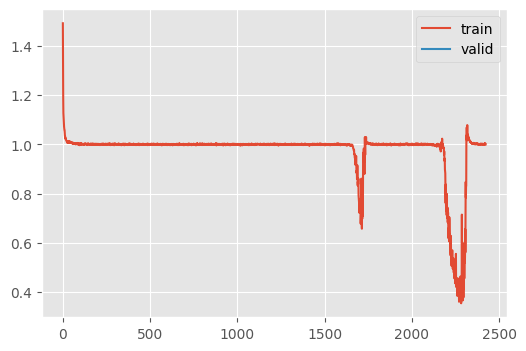

In [8]:
%%time
un = conditional_train(un, dls, lr=4e-3, n_epochs=25)

In [9]:
#| hide
import nbdev

nbdev.nbdev_export()

KeyboardInterrupt: 